You need to make a copy to your own Google drive if you want to edit the original notebook! Start by opening this notebook on Colab 👇

<a href="https://colab.research.google.com/github/PJalgotrader/Deep_forecasting-USU/blob/main/Lectures%20and%20codes/Module%202-%20Setting%20up%20DF%20environment/module2_ts_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> 



![logo](https://upload.wikimedia.org/wikipedia/commons/4/44/Huntsman-Wordmark-with-USU-Blue.gif#center) 



## 🔗 Links

[![linkedin](https://img.shields.io/badge/LinkedIn-0A66C2?style=for-the-badge&logo=linkedin&logoColor=white)](https://www.linkedin.com/in/pedram-jahangiry-cfa-5778015a)

[![Youtube](https://img.shields.io/badge/youtube_channel-1DA1F2?style=for-the-badge&logo=youtube&logoColor=white&color=FF0000)](https://www.youtube.com/channel/UCNDElcuuyX-2pSatVBDpJJQ)

[![Twitter URL](https://img.shields.io/twitter/url/https/twitter.com/PedramJahangiry.svg?style=social&label=Follow%20%40PedramJahangiry)](https://twitter.com/PedramJahangiry)


---

# Time series basics in python

statsmodels.tsa contains model classes and functions that are useful for time series analysis. https://www.statsmodels.org/stable/tsa.html

If you are using Google Colab, you need to first check your statsmodels version. If it is anything above '0.13.5', you are in good shape and you can continue to the next steps but if the version is anything older that '0.13.5', you need to upgrade your statsmodels package by running the following code: 

In [1]:
# checking out statsmodels version
import statsmodels
statsmodels.__version__

'0.14.0'

In [ ]:
# Google Colab users only, run this cell only if your version is older that '0.13.5'. 
!pip install -U statsmodels

In [2]:
# restart runtime and run the following:
import statsmodels
statsmodels.__version__

'0.14.0'

You should see '0.13.5' or higher version. 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
import warnings
warnings.filterwarnings('ignore')

## Data transformation

In [5]:
airpass = pd.read_csv("https://raw.githubusercontent.com/PJalgotrader/Deep_forecasting-USU/main/data/airline_passengers.csv")
airpass.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [10]:
airpass['Month']= pd.to_datetime(airpass['Month'])
airpass.set_index('Month', inplace=True)
airpass

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


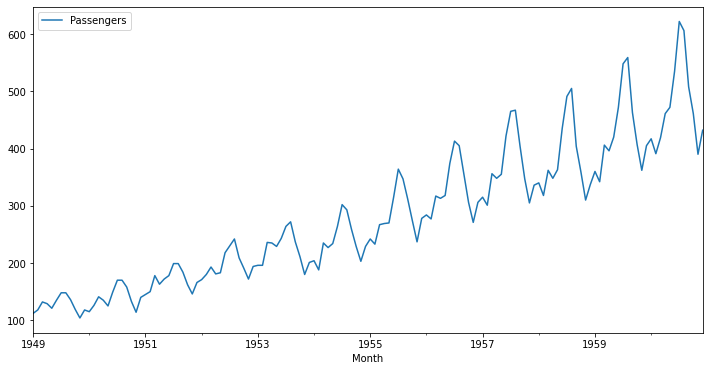

In [11]:
airpass.plot(figsize=(12,6))
plt.show()

In [12]:
# Log transformation 
airpass['log_pass']= np.log(airpass.Passengers)

# power transformation, say p=0.5
airpass['sqrt_pass']= np.sqrt(airpass.Passengers)

airpass.head()

,Passengers,log_pass,sqrt_pass
Month,,,
1949-01-01,112,4.718499,10.583005
1949-02-01,118,4.770685,10.862780
1949-03-01,132,4.882802,11.489125
1949-04-01,129,4.859812,11.357817
1949-05-01,121,4.795791,11.000000


In [13]:
# Box-Cox 
from scipy.stats import boxcox


In [14]:
airpass['boxcox_pass'] , lambd = boxcox(airpass.Passengers)
airpass

,Passengers,log_pass,sqrt_pass,boxcox_pass
Month,,,,
1949-01-01,112,4.718499,10.583005,6.827490
1949-02-01,118,4.770685,10.862780,6.932822
1949-03-01,132,4.882802,11.489125,7.161892
1949-04-01,129,4.859812,11.357817,7.114611
1949-05-01,121,4.795791,11.000000,6.983787
...,...,...,...,...
1960-08-01,606,6.406880,24.617067,10.684049
1960-09-01,508,6.230481,22.538855,10.234573
1960-10-01,461,6.133398,21.470911,9.992159


In [15]:
lambd

0.14802265137037945

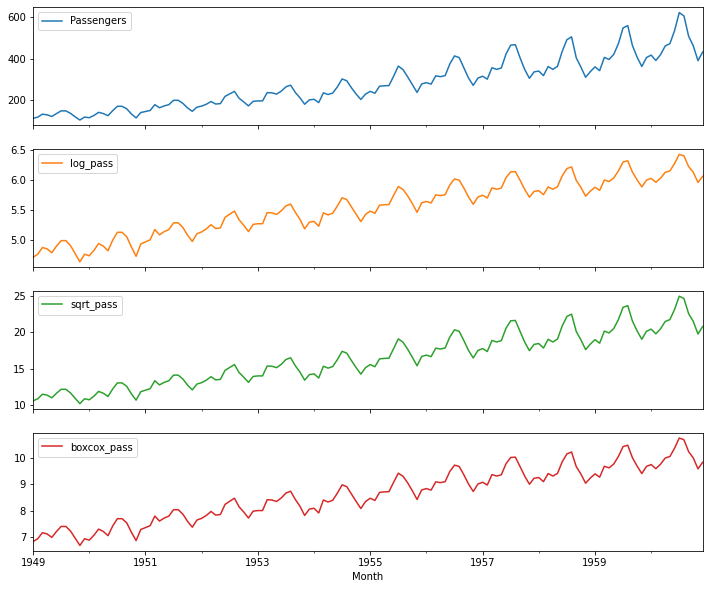

In [16]:
airpass.plot(subplots=True, figsize=(12,10))
plt.show()

## ACF and PACF

* ACF: https://www.statsmodels.org/dev/generated/statsmodels.graphics.tsaplots.plot_acf.html
* PACF: https://www.statsmodels.org/dev/generated/statsmodels.graphics.tsaplots.plot_pacf.html

In [17]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

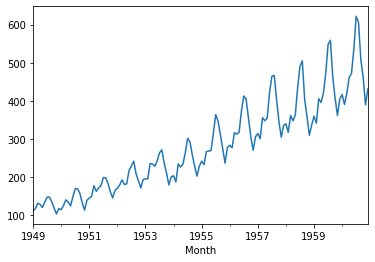

In [18]:
airpass.Passengers.plot()
plt.show()

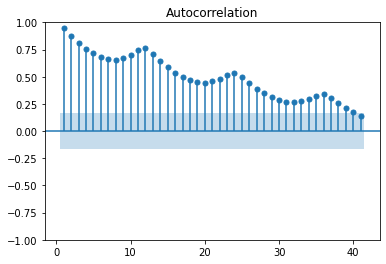

In [19]:
plot_acf(airpass.Passengers, lags = 41, zero=False, alpha=0.05, bartlett_confint=False)
plt.show()

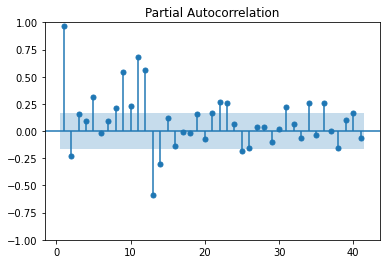

In [20]:
plot_pacf(airpass.boxcox_pass, lags = 41, zero = False,alpha=0.05, method='ols')
plt.show()

## Seasonal Decomposition: 

https://www.statsmodels.org/dev/generated/statsmodels.tsa.seasonal.seasonal_decompose.html

In [21]:
from statsmodels.tsa.seasonal import seasonal_decompose

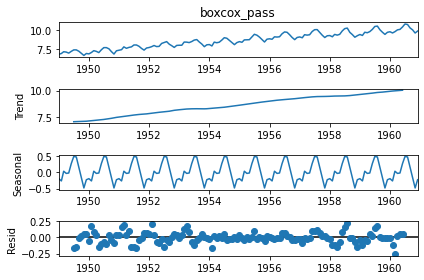

In [22]:
result = seasonal_decompose(airpass.boxcox_pass, model='additive')  
result.plot();
plt.show()

## White Noise: 


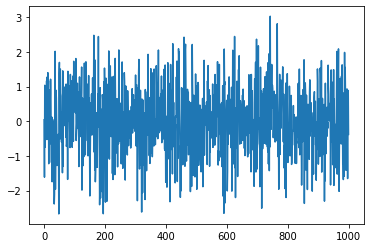

In [23]:
wn = np.random.randn(1000)
plt.plot(wn)
plt.show()


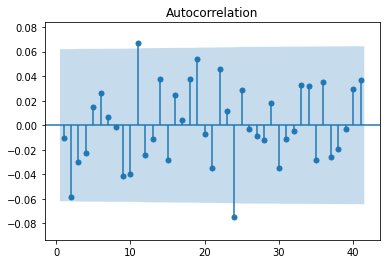

In [24]:
plot_acf(wn, lags = 41, zero=False, alpha=0.05 , auto_ylims=True)
plt.show()

## Random Walk: 


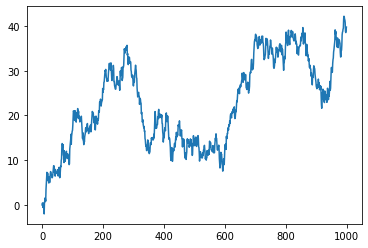

In [25]:
rw = np.zeros(1000)

for i in range(1,1000):
    rw[i] = rw[i-1]+ np.random.randn()
    
plt.plot(rw)
plt.show()

## Forecasting benchmarks

In [ ]:
# Google Colab users only:
!pip install yfinance

In [7]:
import yfinance as yf

'0.2.7'

In [13]:
aapl = yf.download('AAPL', start='2021-01-01',end='2023-01-23')[['Adj Close']]
aapl.head()


[*********************100%***********************]  1 of 1 completed


,Adj Close
Date,
2021-01-04 00:00:00-05:00,127.874969
2021-01-05 00:00:00-05:00,129.455948
2021-01-06 00:00:00-05:00,125.098282
2021-01-07 00:00:00-05:00,129.367035
2021-01-08 00:00:00-05:00,130.483658


In [14]:
aapl['MA30']= aapl['Adj Close'].rolling(30).mean()
aapl

,Adj Close,MA30
Date,,
2021-01-04 00:00:00-05:00,127.874969,NaN
2021-01-05 00:00:00-05:00,129.455948,NaN
2021-01-06 00:00:00-05:00,125.098282,NaN
2021-01-07 00:00:00-05:00,129.367035,NaN
2021-01-08 00:00:00-05:00,130.483658,NaN
...,...,...
2023-01-13 00:00:00-05:00,134.759995,135.467333
2023-01-17 00:00:00-05:00,135.940002,135.055000
2023-01-18 00:00:00-05:00,135.210007,134.635000


<Figure size 864x720 with 0 Axes>

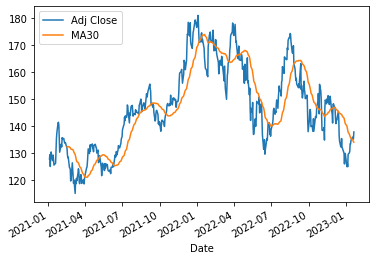

In [16]:
plt.figure(figsize=(12,10))
aapl.plot()
plt.show()

In [17]:
aapl.isna()

,Adj Close,MA30
Date,,
2021-01-04 00:00:00-05:00,False,True
2021-01-05 00:00:00-05:00,False,True
2021-01-06 00:00:00-05:00,False,True
2021-01-07 00:00:00-05:00,False,True
2021-01-08 00:00:00-05:00,False,True
...,...,...
2023-01-13 00:00:00-05:00,False,False
2023-01-17 00:00:00-05:00,False,False
2023-01-18 00:00:00-05:00,False,False


In [18]:
# Filling the NA's
aapl['MA30']= aapl['MA30'].fillna(method = 'bfill')
# ffill =  this is front filling meaning that using last price for missing value
# bfill =  this is back filling meaning that using next price for missing values

<Figure size 864x720 with 0 Axes>

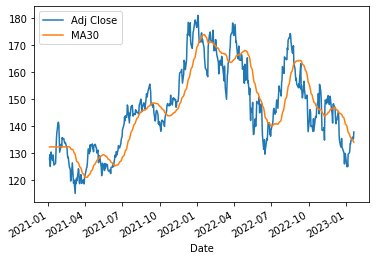

In [19]:
plt.figure(figsize=(12,10))
aapl.plot()
plt.show()

In [20]:
# let's split the data intor train and test
len(aapl)

516

In [21]:
train = aapl[0:456]
test = aapl[456:]

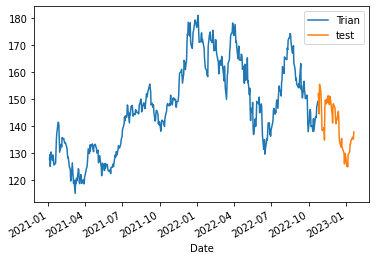

In [22]:
train['Adj Close'].plot(legend = True, label='Trian')
test['Adj Close'].plot(legend = True, label='test')
plt.show()



In [23]:
aapl

,Adj Close,MA30
Date,,
2021-01-04 00:00:00-05:00,127.874969,132.355749
2021-01-05 00:00:00-05:00,129.455948,132.355749
2021-01-06 00:00:00-05:00,125.098282,132.355749
2021-01-07 00:00:00-05:00,129.367035,132.355749
2021-01-08 00:00:00-05:00,130.483658,132.355749
...,...,...
2023-01-13 00:00:00-05:00,134.759995,135.467333
2023-01-17 00:00:00-05:00,135.940002,135.055000
2023-01-18 00:00:00-05:00,135.210007,134.635000


In [24]:
# Let's add some forecast benchmarks
test['naive forecast'] = test['Adj Close'].shift(1)
test['mean forecast'] = test['Adj Close'].mean()
test.head()

,Adj Close,MA30,naive forecast,mean forecast
Date,,,,
2022-10-25 00:00:00-04:00,152.087708,146.482004,NaN,140.410316
2022-10-26 00:00:00-04:00,149.102661,146.283666,152.087708,140.410316
2022-10-27 00:00:00-04:00,144.560196,146.031752,149.102661,140.410316
2022-10-28 00:00:00-04:00,155.482086,146.199474,144.560196,140.410316
2022-10-31 00:00:00-04:00,153.086044,146.161537,155.482086,140.410316


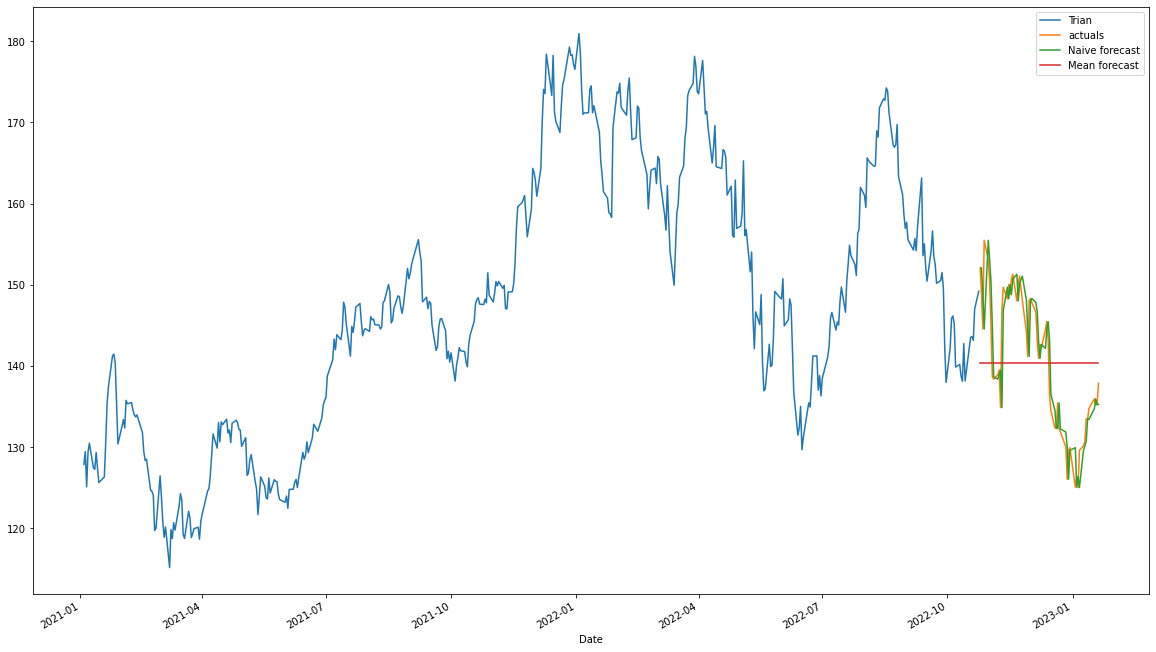

In [27]:
plt.figure(figsize=(20,12))

train['Adj Close'].plot(legend = True, label='Trian')
test['Adj Close'].plot(legend = True, label='actuals')
test['naive forecast'].plot(legend = True, label='Naive forecast')
test['mean forecast'].plot(legend = True, label='Mean forecast')

plt.show()


### Log returns



In [2]:
def log_ret(price):
  log_price = np.log(price)
  return log_price.diff()